In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import fastparquet

In [3]:
pd_past = pd.read_csv('past_vols.csv', index_col=0)
pd_train = pd.read_csv('optiver/train.csv', index_col=0)

In [4]:
baseline = pd.merge(pd_past, pd_train, how='inner', on=['stock_id', 'time_id'])

In [5]:
baseline.head()

,stock_id,time_id,sigma,target
0,0,5,0.004499,0.004136
1,0,11,0.001204,0.001445
2,0,16,0.002369,0.002168
3,0,31,0.002574,0.002195
4,0,62,0.001894,0.001747


In [6]:
vols = baseline.loc[:, ['sigma', 'target']]
vols.head()

,sigma,target
0,0.004499,0.004136
1,0.001204,0.001445
2,0.002369,0.002168
3,0.002574,0.002195
4,0.001894,0.001747


In [7]:
vols = vols.to_numpy()

In [8]:
print(np.cov(vols.T))

[[1.28593870e-05 9.20010026e-06]
 [9.20010026e-06 8.62111148e-06]]


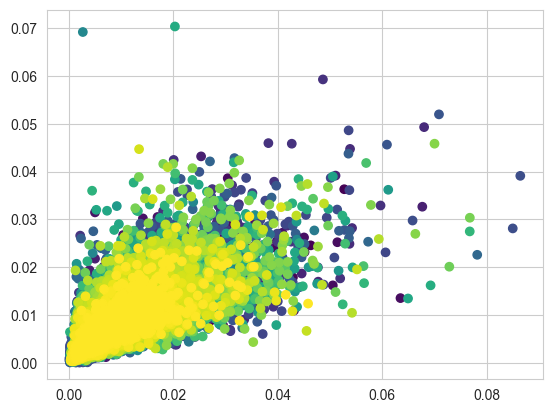

In [9]:
import matplotlib.pyplot as plt
plt.scatter(vols[:, 0], vols[:, 1], c=baseline['stock_id'].values, cmap='viridis')

In [10]:
ratio = vols[:, 1] / vols[:, 0]

(array([1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00,
        2.0000e+00, 2.0000e+00, 3.0000e+00, 5.0000e+00, 6.0000e+00,
        4.0000e+00, 4.0000e+00, 7.0000e+00, 1.1000e+01, 1.4000e+01,
        1.5000e+01, 2.4000e+01, 3.0000e+01, 6.3000e+01, 7.1000e+01,
        1.0000e+02, 1.8100e+02, 3.1300e+02, 4.6700e+02, 7.2900e+02,
        1.0800e+03, 1.7750e+03, 2.7280e+03, 4.0860e+03, 6.4160e+03,
        9.2730e+03, 1.3497e+04, 1.8945e+04, 2.6707e+04, 3.5152e+04,
        4.3825e+04, 4.9361e+04, 4.8720e+04, 4.3492e+04, 3.5161e+04,
        2.6345e+04, 1.8971e+04, 1.3073e+04, 9.0750e+03, 6.1020e+03,
        4.2270e+03, 2.9070e+03, 1.8850e+03, 1.2560e+03, 8.7800e+02,
        5.6400e+02, 4.1000e+02, 2.5800e+02, 1.7100e+02, 1.2900e+02,
        8.8000e+01, 5.2000e+01, 4.7000e+01, 3.7000e+01, 2.6000e+01,
        2.9000e+01, 1.5000e+01, 1.9000e+01, 2.00

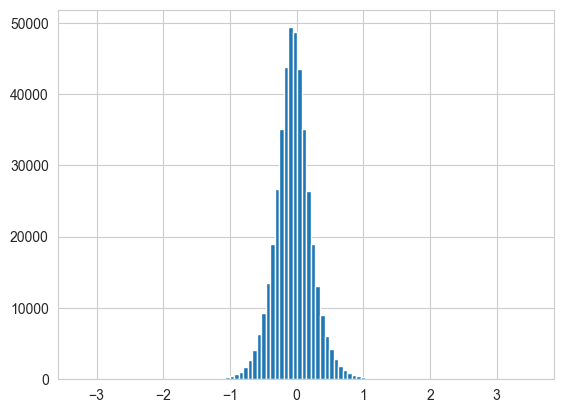

In [11]:
plt.hist(np.log(ratio), bins=100)

In [12]:
from scipy.stats import gaussian_kde 

log_ratio = np.log(ratio)
kde = gaussian_kde(log_ratio)

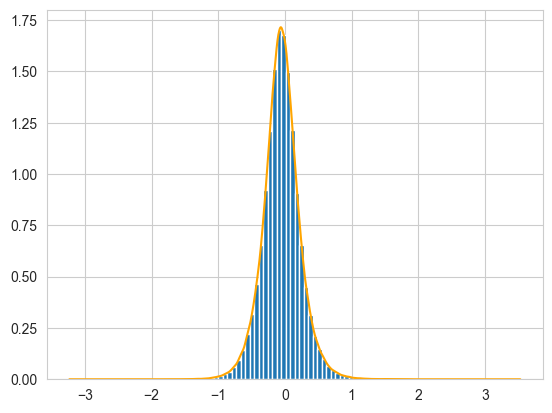

In [13]:
plt.hist(log_ratio, bins=100, density=True)
x = np.linspace(log_ratio.min(), log_ratio.max(), num=1000)
plt.plot(x, kde(x), c='orange')

In [14]:
stock_groupby = baseline.groupby('stock_id')

In [15]:
average_vols = stock_groupby['sigma'].mean()

In [16]:
sorted_vols = average_vols.sort_values(ascending=True)

<Axes: ylabel='Frequency'>

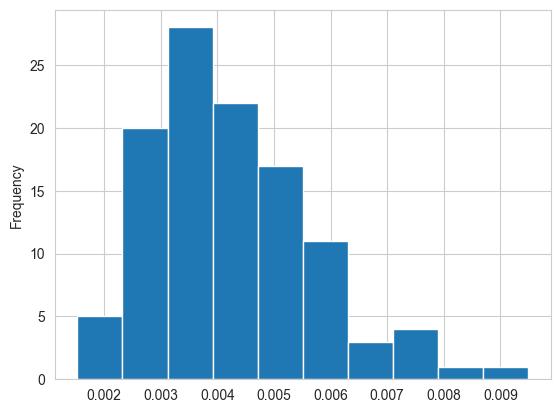

In [17]:
sorted_vols.plot(kind='hist')

In [18]:
example_stock = 1
baseline_example_stock = baseline.query("""stock_id == 1""")
baseline_example_stock.head()

,stock_id,time_id,sigma,target
3830,1,5,0.006245,0.006340
3831,1,11,0.002305,0.002099
3832,1,16,0.002517,0.002456
3833,1,31,0.003570,0.002807
3834,1,62,0.002903,0.004312


In [19]:
len(baseline_example_stock.reset_index().loc[:49, 'sigma'].values.flatten())

50

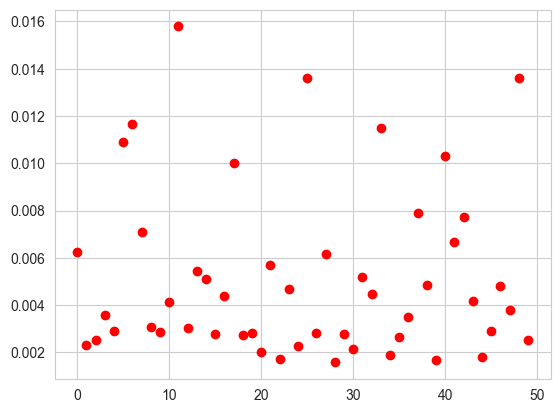

In [20]:
plt.scatter(range(50), baseline_example_stock.reset_index().loc[:49, 'sigma'].values.flatten(), c='red')

In [24]:
(((baseline['sigma'] - baseline['target']) / baseline['target']) ** 2).mean()**0.5

0.3413544901880096

In [25]:
baseline.to_csv('baseline.csv')

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit()